In [18]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from numpy import percentile
from plotly.subplots import make_subplots
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tqdm.notebook import tqdm

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/src")
from conf.database import db
from process.utility import find_cso_cluster, find_sites

In [2]:
target_cols, _ = find_sites()

In [45]:
query = {}
project = {"_id": 0}
df = (
    pd.DataFrame(
        db["WESSEX_E_Numbers_Apr_2019_60Min_Mean"].find(query, project)
    )
    .set_index("Datetime")
    .sort_index()
)

<AxesSubplot:xlabel='value', ylabel='variable'>

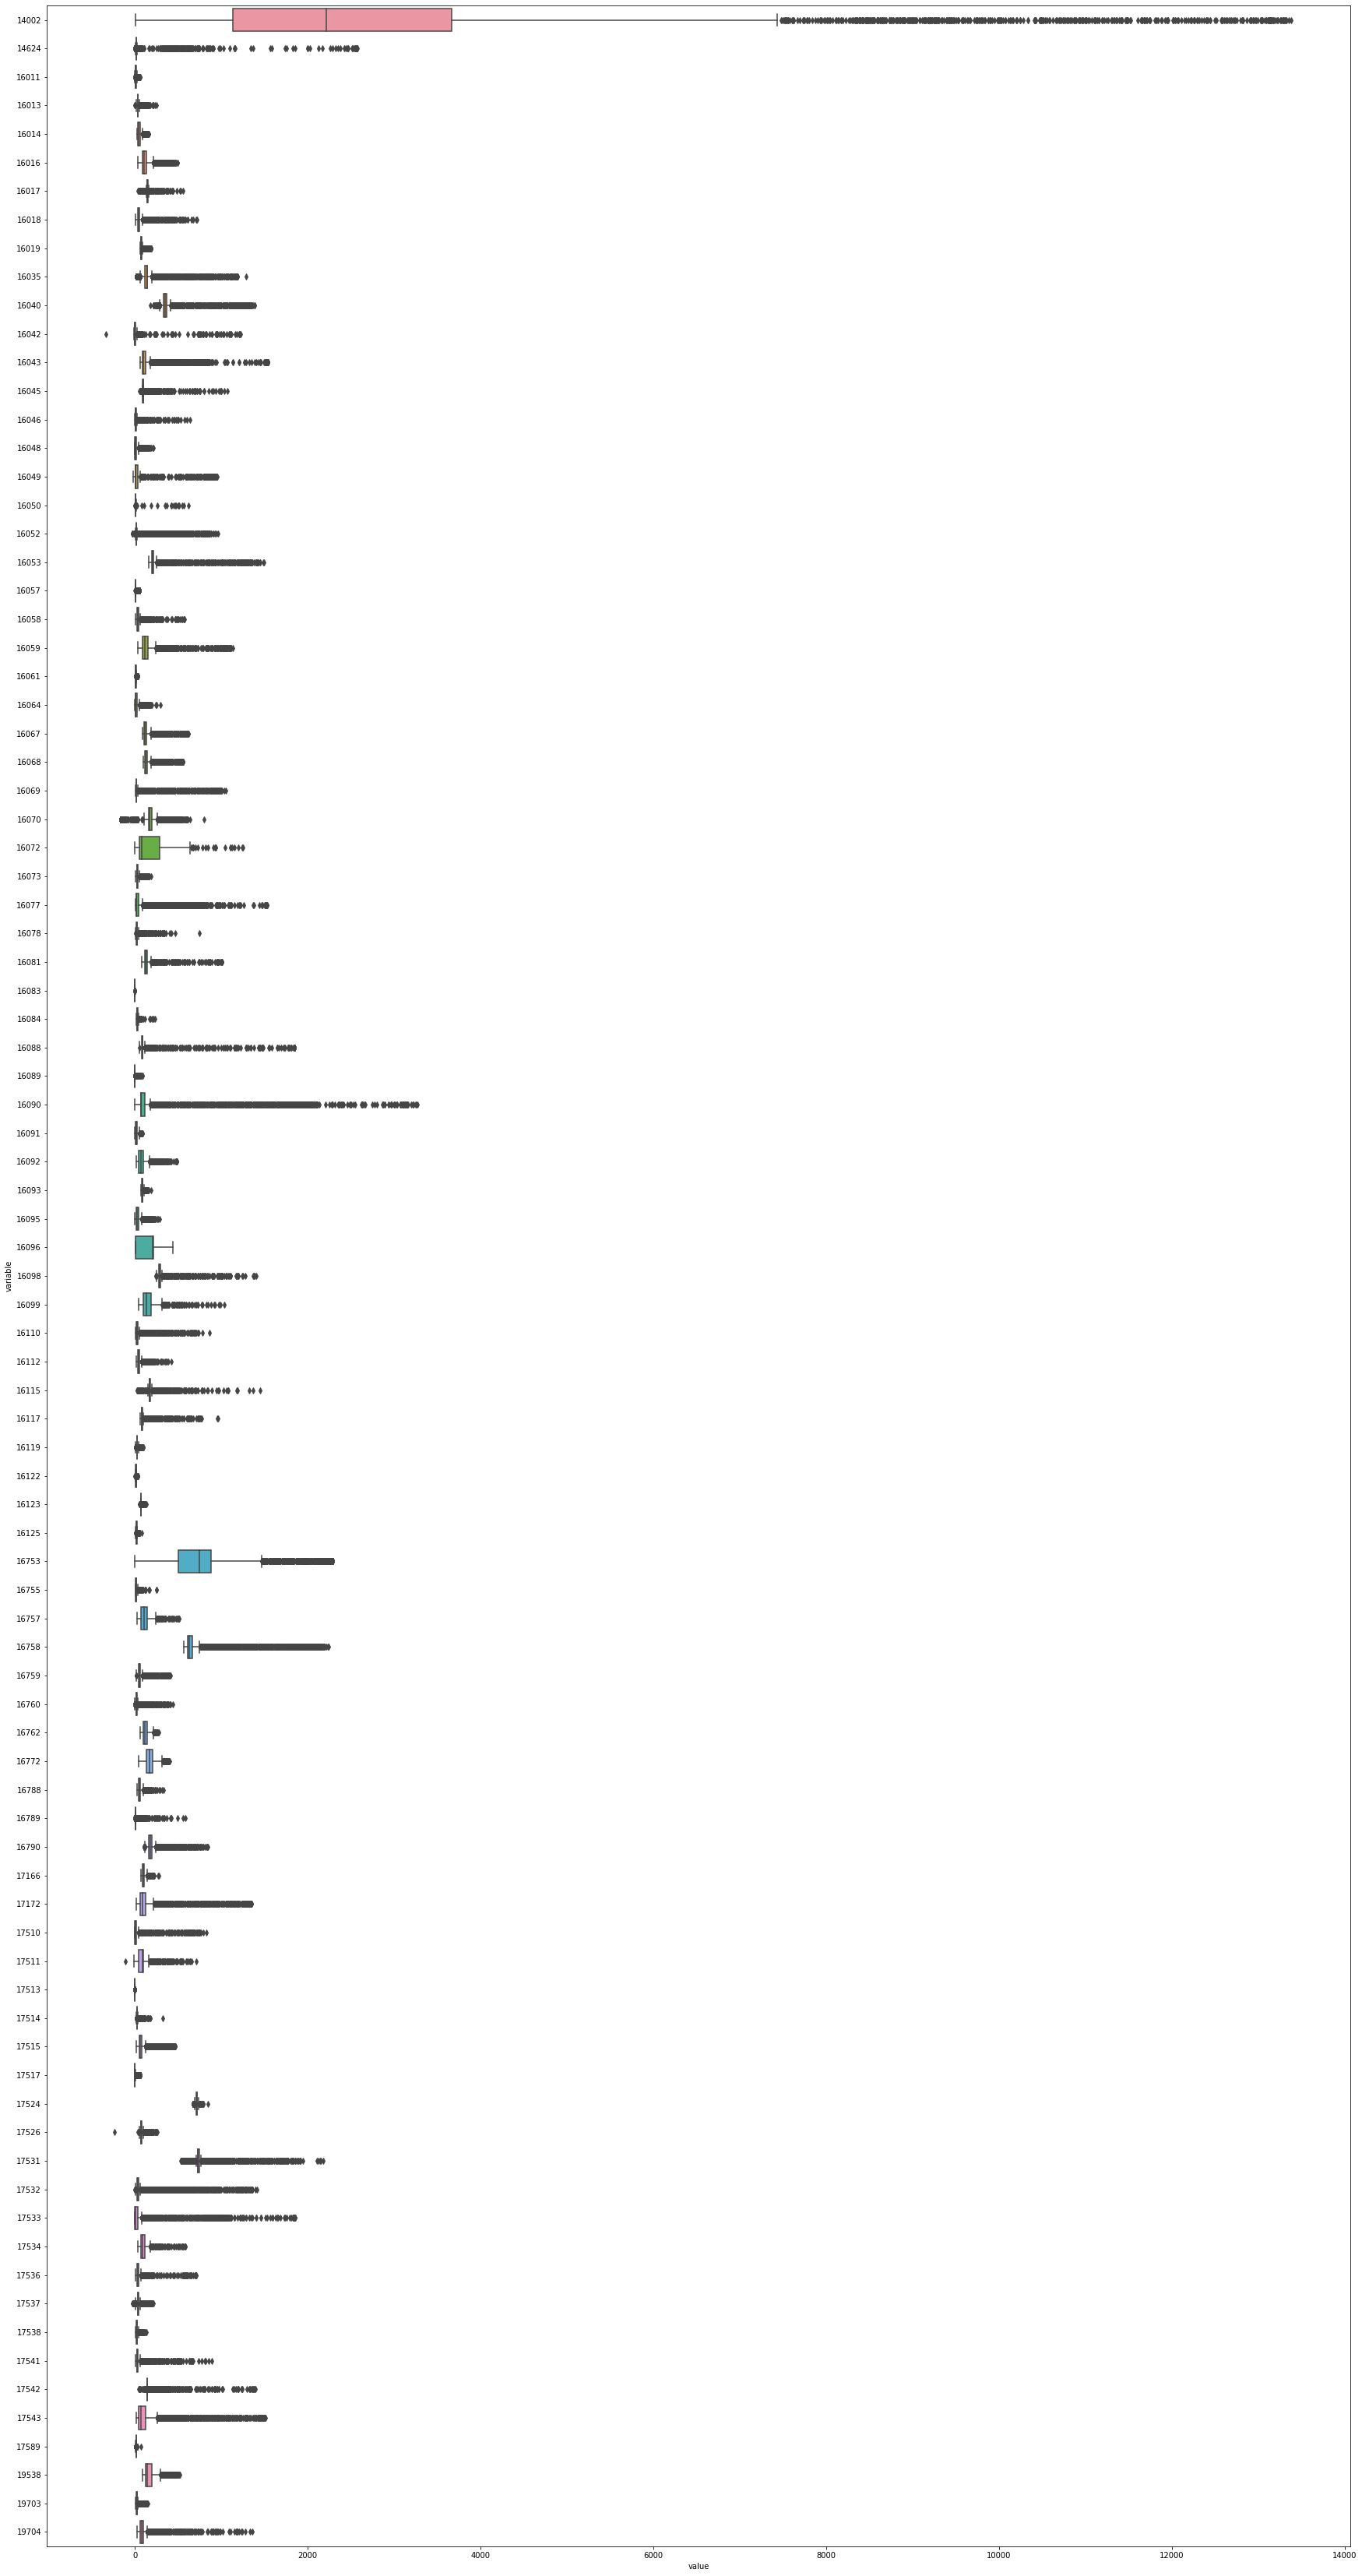

In [46]:
fig, ax=plt.subplots(figsize=(30,60))
sns.boxplot(y='variable', x='value', data=df.melt())

Percentiles: 25th = 71, 75th = 71, IQR = 0

k=1.5, lower cutoff = 71, upper cutoff = 71
Percentage of outliers = 16%

k=3, lower cutoff = 71, upper cutoff = 71
Percentage of outliers = 16%

k=20, lower cutoff = 71, upper cutoff = 71
Percentage of outliers = 16%


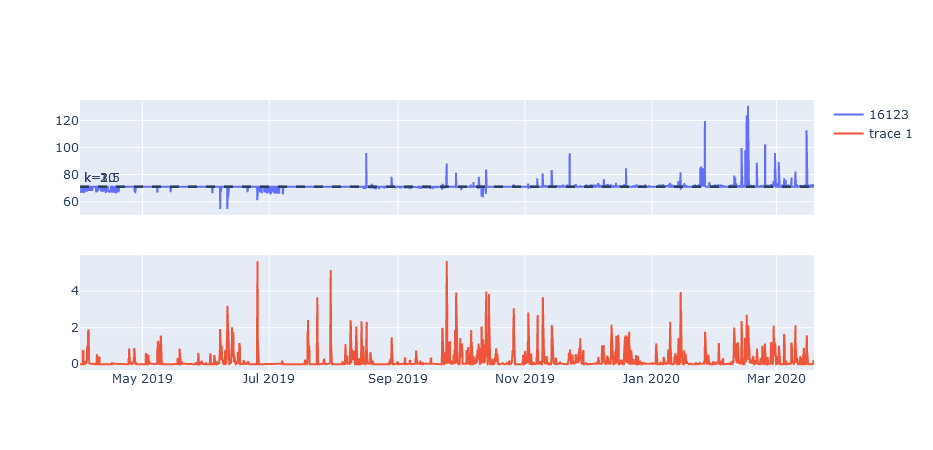

In [115]:
target="16753"
query = {}
project = {"_id": 0}
rain_df = pd.DataFrame(
    db["WESSEX_Rain_Apr_2019_Processed"].find(query, project)
).set_index("Datetime").sort_index()

fig = make_subplots(
rows=2,
cols=1,
    shared_xaxes=True
)
fig.add_trace(go.Scatter(x=df[target].index, y=df[target], name=target), row=1, col=1)
fig.add_trace(go.Scatter(x=rain_df.index, y=rain_df["rain_7h_cent_mean"]), row=2, col=1)

q25, q75 = percentile(df[target], 25), percentile(df[target], 75)
iqr = q75 - q25

k = 1.5
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1   
    )
print(f"Percentiles: 25th = {round(q25)}, 75th = {round(q75)}, IQR = {round(iqr)}")
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

k = 3
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1        
    )
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

k = 20
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1        
    )
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

fig.show()

Setting k=1.5, or the more conservative k=3, or even k=20 all result in the same outcome. Interesting and relevant signals, caused by features such as rain, are removed completely. Only a flat line on the baseline remains. This is due to the fact that the dataset is highly imbalanced, with the majority of data oscillating around the median.

Percentiles: 25th = 160, 75th = 201, IQR = 41

k=1.5, lower cutoff = 99, upper cutoff = 262
Percentage of outliers = 17%

k=3, lower cutoff = 38, upper cutoff = 323
Percentage of outliers = 15%

k=20, lower cutoff = -653, upper cutoff = 1014
Percentage of outliers = 0%


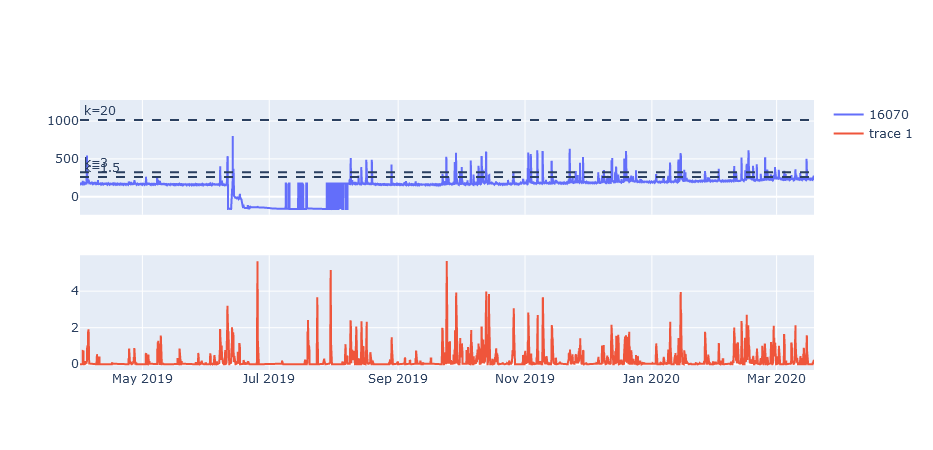

In [118]:
target="16070"
query = {}
project = {"_id": 0}
rain_df = pd.DataFrame(
    db["WESSEX_Rain_Apr_2019_Processed"].find(query, project)
).set_index("Datetime").sort_index()

fig = make_subplots(
rows=2,
cols=1,
    shared_xaxes=True
)
fig.add_trace(go.Scatter(x=df[target].index, y=df[target], name=target), row=1, col=1)
fig.add_trace(go.Scatter(x=rain_df.index, y=rain_df["rain_7h_cent_mean"]), row=2, col=1)

q25, q75 = percentile(df[target], 25), percentile(df[target], 75)
iqr = q75 - q25

k = 1.5
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1   
    )
print(f"Percentiles: 25th = {round(q25)}, 75th = {round(q75)}, IQR = {round(iqr)}")
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

k = 3
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1        
    )
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

k = 20
cut_off = iqr * k
lower, upper = q25-cut_off, q75+cut_off
outliers = [x for x in df[target] if x < lower or x > upper]
fig.add_hline(
    y=upper,
    line_dash="dash",
    annotation_text=f"k={k}",
    annotation_position="top left",
    row=1,
    col=1        
    )
print("")
print(f"k={k}, lower cutoff = {round(lower)}, upper cutoff = {round(upper)}")
print(f"Percentage of outliers = {round(100 * len(outliers) / len(df[target]))}%")

fig.show()